# **Tiesinė regresija**

## 0 žinksnis: **Bibliotekų importavimas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Duomenų padalinimui į mokymo ir testavimo imtis
from sklearn.linear_model import LinearRegression # Paprastai tiesinei regresijai
from sklearn.metrics import mean_squared_error, r2_score  # Modelio vertinimo metrikoms (MSE, R²)
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF skaičiavimui multikolinearumo tikrinimui
from statsmodels.tools.tools import add_constant  # Prideda konstantą (intercept) regresijos modeliui

## 1 žinksnis: **Duomenų įkėlimas**

### 1.1 Duomenų parsisiuntimas

In [3]:
# # Nustatome URL
# url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# # Įkeliame duomenis iš URL
# df = pd.read_csv(url)

# # Išsaugome kaip CSV failą į kompiuterį (pavyzdžiui, į tą pačią direktoriją)
# df.to_csv("BostonHousing.csv", index=False)

# print("Failas 'BostonHousing.csv' sėkmingai išsaugotas!")
# # Galima užkomentuoti, nes failas buvo parsisiūstas anksčiau

### 1.2. Duomenų įkėlimas

In [4]:
df = pd.read_csv("BostonHousing.csv")   # vietinis failas
df = df.drop(columns=['b'])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# 🏠 Boston Housing Dataset – Stulpelių aprašymas

| Stulpelis   | Tipas   | Paaiškinimas |
|-------------|---------|--------------|
| `crim`      | 🕵️‍♂️ Float | Nusikalstamumo lygis vienam gyventojui |
| `zn`        | 🏡 Float | Žemės dalis vienbučiams namams (procentais) |
| `indus`     | 🏭 Float | Pramoninių zonų dalis rajone |
| `chas`      | 🌊 Int   | Ar šalia yra Charles upė (1 – taip, 0 – ne) |
| `nox`       | 🛑 Float | Azoto oksidų koncentracija ore (tarša) |
| `rm`        | 🛏️ Float | Vidutinis kambarių skaičius name |
| `age`       | 📅 Float | Pastatų, pastatytų iki 1940 m., procentas |
| `dis`       | 🚗 Float | Atstumas iki penkių pagrindinių darbo centrų |
| `rad`       | 🚦 Int   | Prieiga prie greitkelių (kategorinis kodas) |
| `tax`       | 💸 Int   | Turto mokesčio tarifas (už 10 000 USD) |
| `ptratio`   | 🧑‍🏫 Float | Mokinių ir mokytojų santykis |
| `lstat`     | 📉 Float | Mažų pajamų grupės procentas rajone |
| `medv`      | 💰 Float | **Namų kaina (tūkst. dolerių)** – tai mūsų TARGET kintamasis |
---

## 2 žinksnis: **Duomenų apžvalga**

###  2.1 Duomenų struktūra

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


###  2.2 Pagrindinė statistika

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


###  2.3 Trūkstamų reikšmių analizė

In [7]:
df.isnull().sum() # kiek `NaN` yra kiekviename stulpelyje?

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

## 3 Žinksnis: **Duomenų tvarkymas**

- Praleistų reikšmių tvarkymas (NaN)
- Netinkamų reikšmių / outlier’ių tvarkymas
- Stulpelių pervadinimas, tipų keitimas

In [8]:
# Visus stulpelių pavadinimus paverčiame į mažąsias raides
df.columns = [col.lower() for col in df.columns]

## 4 Žinksnis: **Požymių atranka**

#### Ką rodo koreliacijų matrica?

Kiekvienas langelis rodo **koreliacijos koeficientą** tarp dviejų kintamųjų.
Koreliacija svyruoja nuo **-1 iki 1**:

- **+1** - reiškia tobulą teigiamą ryšį
- **-1** – tobulą neigiamą ryšį
- **0** – jokio tiesioginio ryšio

### 4.1 Nubraižome koreliacijų matricą

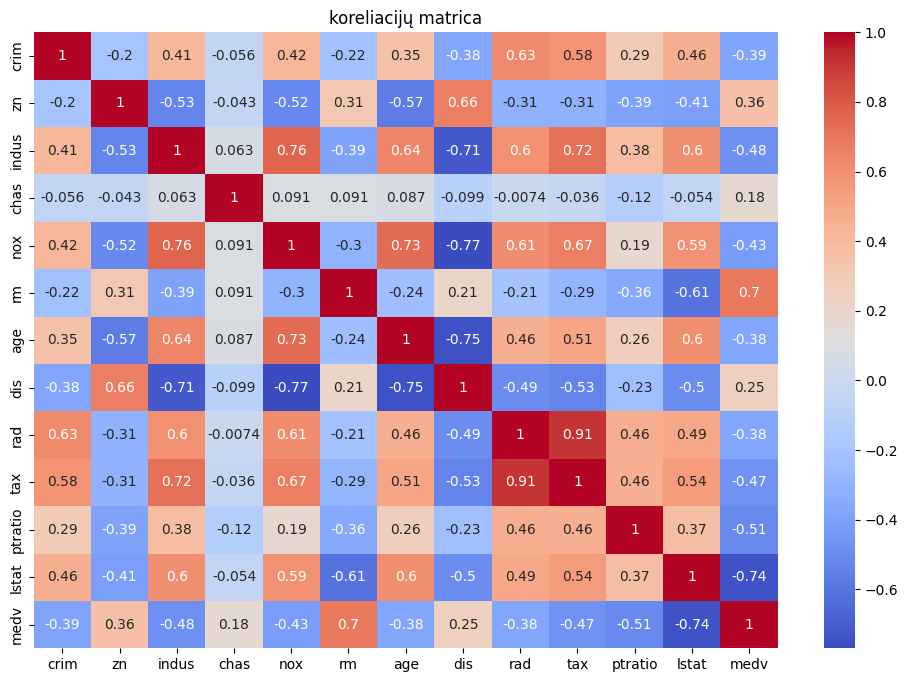

In [9]:
correlation_matrix =df.corr() # apskaičiuoja koreliacijos koeficientus tarp visų stulpelių (Pearson koreliaciją)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") # nupiešia šilumos žemėlapį (heatmap) iš koreliacijų matricos.
# annot=True - ant kiekvieno kvadratėlio užrašo skaičių.
# cmap="coolwarm" - spalvų paletė, kur mėlyna rodo neigiamą koreliaciją, raudona – teigiamą.

plt.title("koreliacijų matrica")
plt.show()

### **Užduotis**: Kurie požymiai labiausiai koreliuoja su namų kaina (medv)?

Stipriausiai teigiama koreliacija su kaina:

* **rm** (0.70) → daugiau kambarių → brangesnis būstas.

Stipriausiai neigiama koreliacija su kaina:

* **lstat** (-0.74) → didesnė mažų pajamų gyventojų dalis → mažesnė būsto kaina.

* **ptratio** (-0.51) → didesnis mokinių ir mokytojų santykis → mažesnė kaina.

### 4.2 Požymių tarpusavio priklausomybės įvertinimas (VIF)

In [10]:
features = ["rm", "lstat", "ptratio", "indus", "nox",  "rad"] #išmetame tax nes jo reikšmė didžiausia (dėl multikoleanerumo)
X = df[features]
X = add_constant(X) # intercept reikšmė

# Apskaičiuojam kiekvienam kintamajam VIF rodiklį
vif_data = pd.DataFrame()
vif_data["Kintamasis"] = X.columns
vif_data["VIF reikšmė"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Kintamasis  VIF reikšmė
0      const   394.879522
1         rm     1.742556
2      lstat     2.432773
3    ptratio     1.567493
4      indus     2.951930
5        nox     3.116995
6        rad     2.105305


# VIF (Variance Inflation Factor) analizė

| Kintamasis | VIF reikšmė | Interpretacija |
|------------|-------------|----------------|
| `const`    | **411.79**  | Labai aukšta – tai modelio interceptas, galima ignoruoti |
| `rm`       | 1.75        | ✅ Žema VIF – saugu naudoti |
| `lstat`    | 2.43        | ✅ Žema VIF – saugu naudoti |
| `ptratio`  | 1.57        | ✅ Puiki reikšmė |
| `indus`    | 3.52        | ⚠️ Vidutinė koreliacija su kitais – stebėtinas |
| `nox`      | 3.12        | ⚠️ Vidutinė koreliacija – galima palikti |
| `tax`      | **8.27**    | ❗ Aukštas VIF – galimas multikolinearumas |
| `rad`      | **6.69**    | ❗ Aukštas VIF – ypač su `tax`, patikrink koreliacijų matricą |

---

---

### **Užduotis**: Nubraižykite "rm" (kambarių skaičius) ir "medv" (kaina) sklaidos grafiką


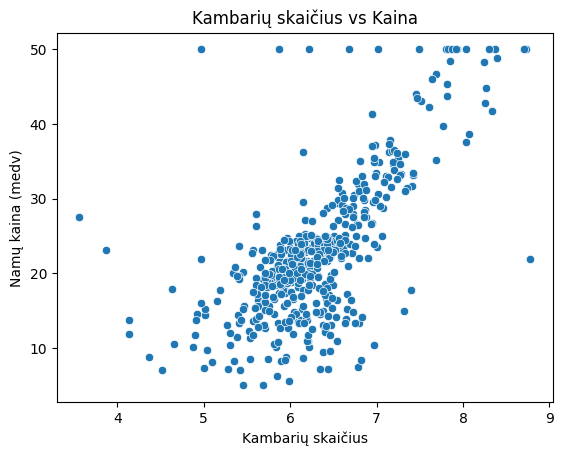

In [11]:
sns.scatterplot(x="rm", y="medv", data=df)
plt.title("Kambarių skaičius vs Kaina")
plt.xlabel("Kambarių skaičius")
plt.ylabel("Namų kaina (medv)")
plt.show()

- Ryšys teigiamas – daugiau kambarių → brangesni namai.
- Outlieriai – pigūs namai su daug kambarių, brangūs su mažiau.
- Kainų lubos ties 50k –  virš 50 nebėra duomenų.

## 5 Žinksnis: **Duomenų paruošimas tiesinei regresijai**

Šiame žingsnyje mes pasiruošiame duomenis modelio kūrimui.
 Panaudosime **vieną požymį** – `rm` (vidutinis kambarių skaičius), kad prognozuotume `medv` (namų kainą).

In [12]:
X = df[["rm"]]
y = df["medv"]

## 6 Žinksnis: **Duomenų padalinimas į mokymo ir testavimo dalis**

| **Kintamasis**   | **Reikšmė**                                                                 |
|------------------|------------------------------------------------------------------------------|
| `X`              | Nepriklausomas kintamasis: `rm` (vidutinis kambarių skaičius)               |
| `y`              | Priklausomas kintamasis: `medv` (vidutinė namų kaina)                       |
| `test_size`      | `0.2` reiškia, kad 20% duomenų skiriama testavimui                          |
| `random_state`   | Užtikrina, kad duomenų padalijimas visada bus toks pat  |


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Kodėl tai svarbu?
- **Mokymo duomenys (X_train, y_train)** naudojami modelio kūrimui.
- **Testavimo duomenys (X_test, y_test)** naudojami modelio tikslumo įvertinimui.

Jei neskirstytume duomenų – rizikuotume permokyti (**overfitting**) modelį, kuris „išmoktų atmintinai“, bet nesugebėtų prognozuoti naujų duomenų.

#### Duomenų padalijimo vizualizacija (nebūtinas žinksnis)
Tik kad būtų aiškiau.

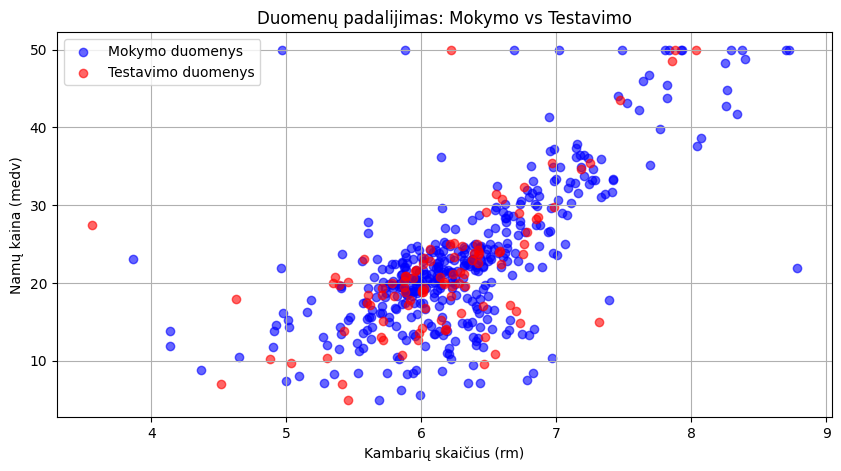

In [14]:
plt.figure(figsize=(10, 5))

# Mokymo duomenys (mėlyna)
plt.scatter(X_train, y_train, color="blue", label="Mokymo duomenys", alpha=0.6)

# Testavimo duomenys (raudona)
plt.scatter(X_test, y_test, color="red", label="Testavimo duomenys", alpha=0.6)

plt.xlabel("Kambarių skaičius (rm)")
plt.ylabel("Namų kaina (medv)")
plt.title("Duomenų padalijimas: Mokymo vs Testavimo")
plt.legend()
plt.grid(True)
plt.show()

## 7 Žinksnis: **Modelio kūrimas**

In [15]:
model= LinearRegression()

## 8 Žinksnis: **Modelio Treniravimas**

In [16]:
# Modelis „mokosi“ ryšio tarp X ir y. 
# Tada bando atspėti target reikšmes pagal nematytus X_test.
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 9 Žinksnis: **Modelio vertinimas**

### 9.1 Modelio koeficientai

In [17]:
print("modelio koeficientas", model.coef_[0])
print("Interceptas", model.intercept_)

modelio koeficientas 9.348301406497722
Interceptas -36.24631889813792


**Modelio koeficientas**: Parodo, kiek vidutiniškai pasikeičia y (namų kaina medv), jeigu x (pvz. kambarių skaičius rm) padidėja vienu vienetu.

* *Kievienas papildomas kambarys pakelia būsto kainą 9,35 tūkstančiais*

**Interceptas**: Tai modelio pradinis taškas, t.y. kokia būtų prognozuojama y reikšmė, kai x = 0.

* *Dažnai neturi realios praktinės prasmės (pvz. namas su 0 kambarių nėra prasmingas), bet matematiškai reikalingas.*

### 9.2 Prognozės testiniams duomenims

In [18]:
y_pred = model.predict(X_test)

### 9.3 Modelio įvertinimo metrikos

#### `mean_squared_error(y_test, y_pred)` – Vidutinė kvadratinė paklaida (MSE)

**Ką reiškia:**  
MSE parodo, kiek **vidutiniškai modelis klysta kvadratu**.  
Kuo **mažesnė MSE**, tuo geresnis modelis.  
Matuojama **tūkstančiais dolerių kvadratu**.

---

#### `r2_score(y_test, y_pred)` – R² (determinacijos koeficientas)

 **Ką reiškia:**  
R² parodo, kiek procentų kintamumo modelis paaiškina.

- `1.0` = tobulas atitikimas  
- `0.0` = modelis nieko nepaaiškina  

In [19]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MSE: 46.144775347317264
R-squared: 0.3707569232254778


*MSE ( vidutinė kvadratinė paklaida) - 46,16 = 6.8 (kvadratu) vidutiniškai modelis sukysta 6.8 tūkstančiais*

R² ( Determinacijos koeficientas) - *Modelis paaiskina 37 proc. kainos kitimo.*

## 10 Žinksnis: **Rezultatų vizualizacija**

### 10.1 Vizualizacija: Tikros ir Prognozuotos kainos

Ką matysim:

* Jei taškai arti raudonos linijos – modelis tikslus
* Jei taškai toli – modelis klysta

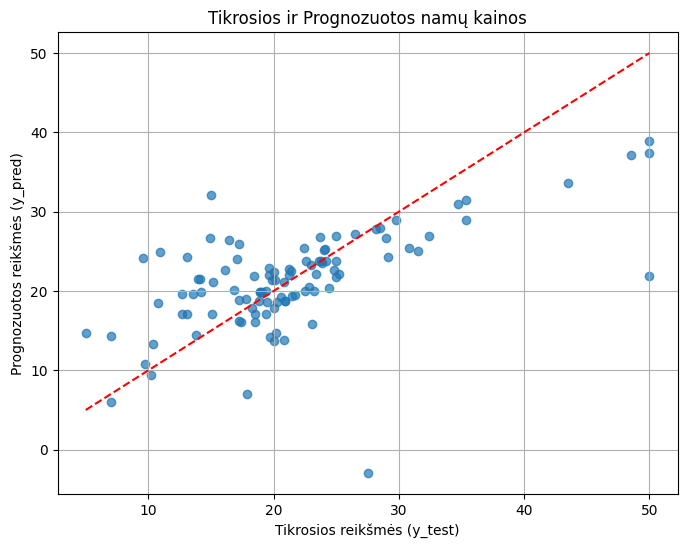

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7) # alpha nurodo taškų permatomumą
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Tikrosios reikšmės (y_test)")
plt.ylabel("Prognozuotos reikšmės (y_pred)")
plt.title("Tikrosios ir Prognozuotos namų kainos")
plt.grid(True)
plt.show()

## 11 Žinksnis: **Paklaidų analizė** (Residual Analysis)

###  Kokia turi būti gera paklaidų forma?

- **Centruotos aplink nulį**  
  Vidutiniškai paklaidos turėtų būti ≈ 0, t. y. modelis nėra sistemingai šališkas į pliusą ar minusą.

- **Simetriškas pasiskirstymas**  
  Paklaidos turėtų būti maždaug simetriškos – dažniausiai tikimasi „varpo formos“ (normaliojo pasiskirstymo).

- **Vienoda sklaida**  
  Paklaidų dydis neturėtų priklausyti nuo prognozuotų reikšmių – išsidėstymas turi būti atsitiktinis, be ryškios struktūros.

- **Nėra aiškaus šališkumo**  
  Neturi būti sistemingo nuokrypio, pvz., kad mažos prognozės visada pervertintos, o didelės nuvertintos.

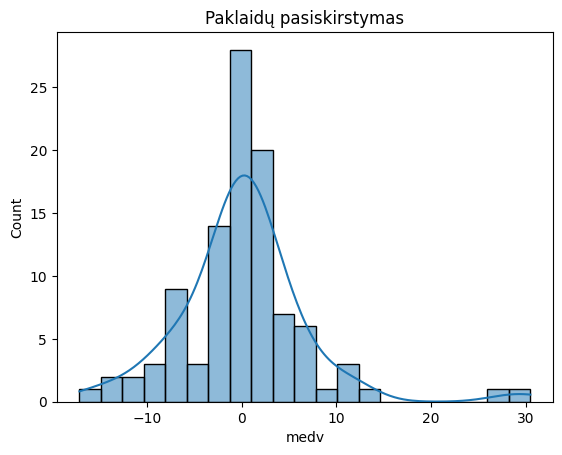

In [ ]:
# Apskaičiuojame paklaidas (residuals) = tikrosios reikšmės minus prognozuotos reikšmės
residuals = y_test - y_pred
# Nubraižome paklaidų histogramą su KDE (kernel density estimate)
sns.histplot(residuals, kde=True) # kde uždeda kreivę
plt.title("Paklaidų pasiskirstymas")
plt.show()

## Išvada:

- **Centruotos aplink nulį**
– didžiausia paklaidų dalis yra aplink 0, vidurkis arti nulio - gerai.

- **Forma panasi į varpo**
– daug paklaidų aplink 0, bet kraštai (tails) šiek tiek „ilgesni“ – vadinasi yra keletas outlier’ių.

- **Simetrija**
– pasiskirstymas gana simetriškas, nėra labai stipraus šališkumo į kairę ar dešinę.

- **Outlier’iai**
– matosi pora stulpelių dešinėje (~20–30) ir kairėje (< -10), kurie išeina už pagrindinio pasiskirstymo ribų -galima sakyti, kad yra keletas išsiskiriančių paklaidų.